# AutoML con Auto-Keras

![](https://2.bp.blogspot.com/-MXSy_I9M6nI/W9cx1LsFKRI/AAAAAAAADdc/HSFi3QnzgNwv5ovScFkLKUT9vyhAqVu2QCLcBGAs/s1600/image1.gif)

In [1]:
!pip install git+https://github.com/keras-team/keras-tuner.git
!pip install autokeras

  Cloning https://github.com/keras-team/keras-tuner.git to /private/var/folders/fk/wgqmzjm522921ms9wlrpvm800000gn/T/pip-req-build-5a95_4r7
  Running command git clone -q https://github.com/keras-team/keras-tuner.git /private/var/folders/fk/wgqmzjm522921ms9wlrpvm800000gn/T/pip-req-build-5a95_4r7
  Resolved https://github.com/keras-team/keras-tuner.git to commit 820e1a6752cf2561b3118a9faedb2a498f5c6b8e
     |████████████████████████████████| 5.9 MB 2.0 MB/s eta 0:00:01
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-macosx_10_9_x86_64.whl (3.5 MB)
     |████████████████████████████████| 123 kB 19.6 MB/s eta 0:00:01
  Using cached tensorboard_plugin_wit-1.8.1-py3-none-any.whl (781 kB)
     |████████████████████████████████| 4.4 MB 53.1 MB/s eta 0:00:01
     |████████████████████████████████| 961 kB 16.3 MB/s eta 0:00:01
     |████████████████████████████████| 232 kB 22.0 MB/s eta 0:00:01
     |███████████████████

In [15]:
import pandas as pd

# Load churn data
churn = pd.read_csv('data/churn_data.csv')

In [16]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [17]:
# Split the data into features and target
X = churn.drop('Churn', axis=1)
y = churn['Churn']

In [18]:
# Split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
import autokeras as ak

In [44]:
# Create an AutoKeras Structured data classifier
clf = ak.StructuredDataClassifier(max_trials=30)
clf.fit(X_train, y_train, epochs=100)

Trial 30 Complete [00h 00m 19s]
val_accuracy: 0.7972477078437805

Best val_accuracy So Far: 0.8064219951629639
Total elapsed time: 00h 11m 57s
INFO:tensorflow:Oracle triggered exit
Epoch 1/100
177/177 [==============================] - 2s 3ms/step - loss: 0.7468 - accuracy: 0.7222
Epoch 2/100
177/177 [==============================] - 1s 3ms/step - loss: 0.5724 - accuracy: 0.7336
Epoch 3/100
177/177 [==============================] - 1s 3ms/step - loss: 0.5395 - accuracy: 0.7401
Epoch 4/100
177/177 [==============================] - 0s 3ms/step - loss: 0.5290 - accuracy: 0.7396
Epoch 5/100
177/177 [==============================] - 0s 3ms/step - loss: 0.5206 - accuracy: 0.7444
Epoch 6/100
177/177 [==============================] - 0s 3ms/step - loss: 0.5134 - accuracy: 0.7531
Epoch 7/100
177/177 [==============================] - 0s 3ms/step - loss: 0.5077 - accuracy: 0.7506
Epoch 8/100
177/177 [==============================] - 0s 3ms/step - loss: 0.5045 - accuracy: 0.7515
Epoch 9/100

In [45]:
# evaluate the model
loss, acc = clf.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.3f' % acc)

Accuracy: 0.781


In [46]:
# get the best performing model
model = clf.export_model()

In [47]:
# summarize the loaded model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 20)]              0         
                                                                 
 multi_category_encoding (Mu  (None, 20)               0         
 ltiCategoryEncoding)                                            
                                                                 
 dense (Dense)               (None, 512)               10752     
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 513   

In [25]:
!pip install visualkeras

     |████████████████████████████████| 511 kB 1.9 MB/s eta 0:00:01


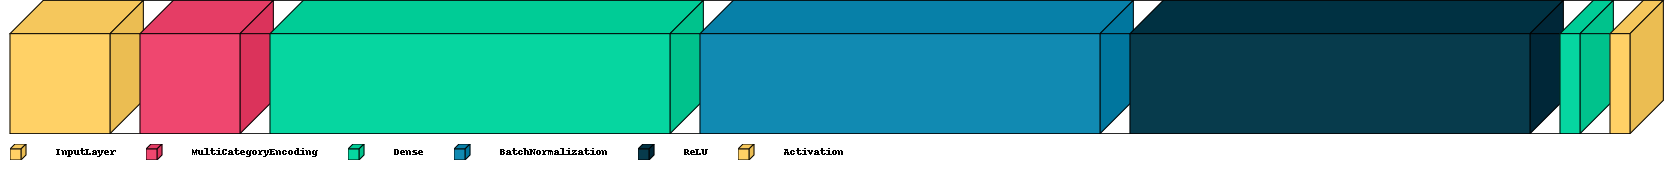

In [51]:
import visualkeras
visualkeras.layered_view(model, legend=True, spacing=30,
                         min_xy=100, scale_z=5)